<a href="https://colab.research.google.com/github/hakureikaze/tfDevProCert/blob/main/Sign_language_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import pandas as pd

The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


In [ ]:
uploaded=files.upload()

Saving sign_mnist_test.csv to sign_mnist_test.csv
Saving sign_mnist_train.csv to sign_mnist_train.csv


In [24]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    with open(filename) as training_file:
      # Your code starts here
      content = pd.read_csv(training_file)
      #print(type(content))
      pixels = content.iloc[:,1:785].values
      labels = content.iloc[:,0].values
      labels = (labels-np.ones(labels.shape)*(labels>8)).astype(int)
      #print(type(pixels))
      images = pixels.reshape(-1, 28, 28)
      # Your code ends here
    return images, labels


training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


[ 3  6  2  2 12 15  8 21  3]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[1126 1010 1144 1196  957 1204 1090 1013 1162 1114 1241 1055 1151 1196
 1088 1279 1294 1199 1186 1161 1082 1225 1164 1118]
24


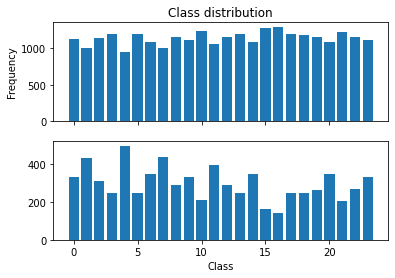

In [ ]:
print(training_labels[:9])
classes, train_counts = np.unique(training_labels, return_counts=True)
_ , test_counts = np.unique(testing_labels, return_counts=True)
print(classes)
print(train_counts)
print(len(classes))

f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.bar(classes, train_counts)
ax1.set_title("Class distribution")
ax1.set_ylabel("Frequency")
ax2.bar(classes, test_counts)
ax1.set_ylabel("Frequency")
ax2.set_xlabel("Class")

plt.show()

In [25]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims
# Your Code Here
#print(training_images.shape)
#print(testing_images.shape)
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)
training_labels = np.expand_dims(training_labels, axis=1)
testing_labels = np.expand_dims(testing_labels, axis=1)
training_labels = tf.keras.utils.to_categorical(training_labels, num_classes=24)
testing_labels = tf.keras.utils.to_categorical(testing_labels, num_classes=24)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
    )
#train_datagen.fit(training_images)
validation_datagen = ImageDataGenerator(
    # Your Code Here
    rescale=1./255)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


(27455, 1)
[[3]
 [6]
 [2]]
(27455, 28, 28, 1)


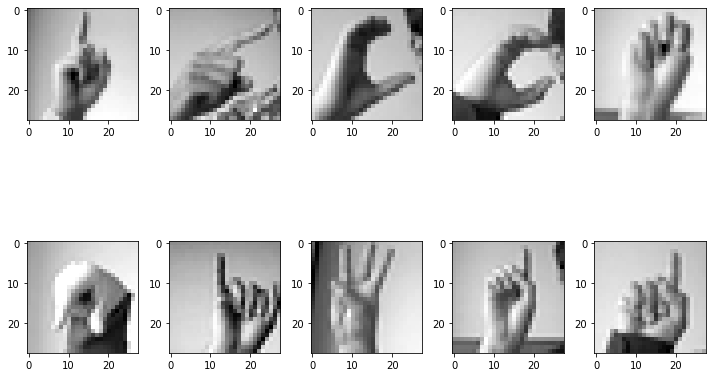

In [15]:
print(training_labels.shape)
print(training_labels[:3])
print(training_images.shape)

f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout() 

In [29]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    # Your Code Here
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    #tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')])

# Compile Model. 
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])# Your Code Here)
model.summary()
print(type(training_images))
print(type(training_labels))
# Train the Model
history = model.fit(train_datagen.flow(training_images, training_labels, 
                                       batch_size=32),
                    epochs=10,
                    validation_data=validation_datagen.flow(testing_images,
                                                            testing_labels,
                                                            batch_size=32))#,
                    #steps_per_epoch = len(training_images)/32, 
                    #validation_steps = len(testing_images)/32)# Your Code Here)

model.evaluate(testing_images/255., testing_labels)
    
# The output from model.evaluate should be close to:
[6.92426086682151, 0.56609035]


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               819712    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)              

[6.92426086682151, 0.56609035]

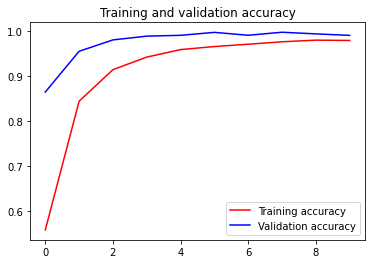

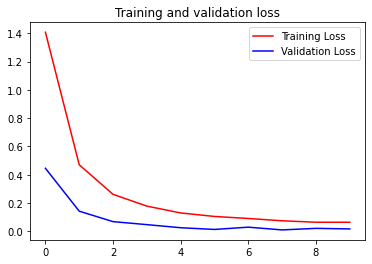

In [33]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']# Your Code Here
val_acc = history.history['val_accuracy']# Your Code Here
loss = history.history['loss']# Your Code Here
val_loss = history.history['val_loss']# Your Code Here

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()